#1.1

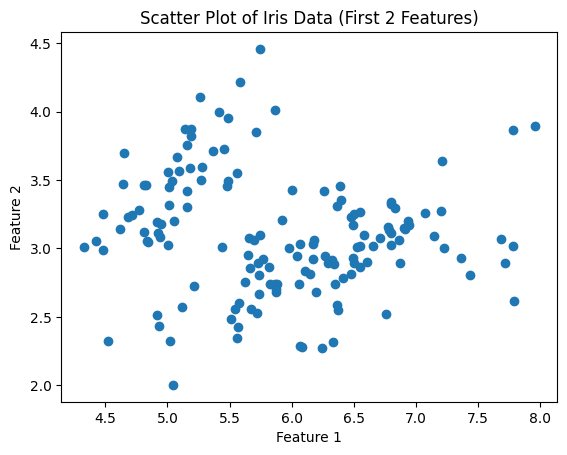

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# load Iris dataset (first 2 features only)
iris_data = np.genfromtxt("iris.txt", delimiter=None)
X = iris_data[:, :2]  # select only first 2 features

# scatter plot of first 2 features
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Iris Data (First 2 Features)")
plt.show()

I think there are about 3 clusters (one on the upper left side of the plot, one that takes up the center and right side of the plot, and one smaall cluster in the upper right corner).

#1.2

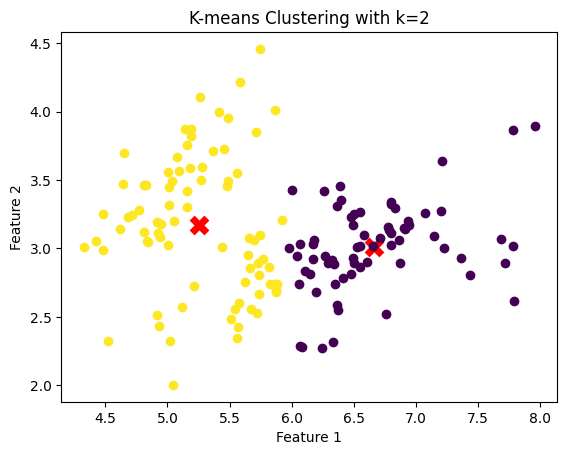

K-means with k=2, best score: 57.88


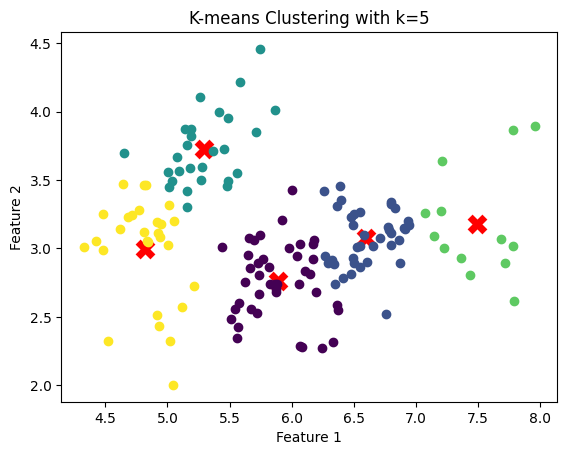

K-means with k=5, best score: 20.91


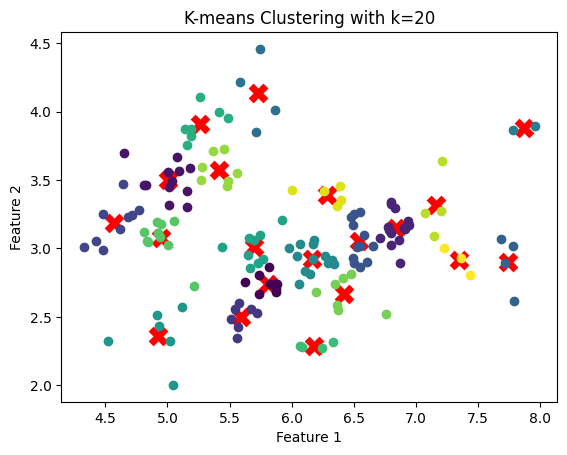

K-means with k=20, best score: 4.12


In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plot

# define K-means function
def run_kmeans(k, X, n_init=10):
    best_score = float('inf')
    best_model = None
    best_labels = None

    for i in range(n_init):
        kmeans = KMeans(n_clusters=k, random_state=i, n_init=1)
        kmeans.fit(X)
        # Sum of squared distances to closest centroid
        score = kmeans.inertia_

        if score < best_score:
            best_score = score
            best_model = kmeans
            best_labels = kmeans.labels_

    return best_model, best_labels, best_score

# run k-means for each k value
k_values = [2, 5, 20]
for k in k_values:
    model, labels, score = run_kmeans(k, X)

    # plot using plotClassify2D
    plot.plotClassify2D(None, X, labels)

    # add cluster centers
    centers = model.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', linewidth=0.05, label='Centroids')

    plt.title(f'K-means Clustering with k={k}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    print(f"K-means with k={k}, best score: {score:.2f}")


#1.3

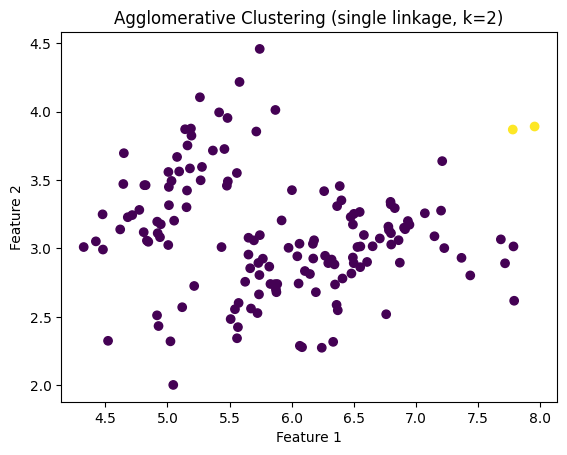

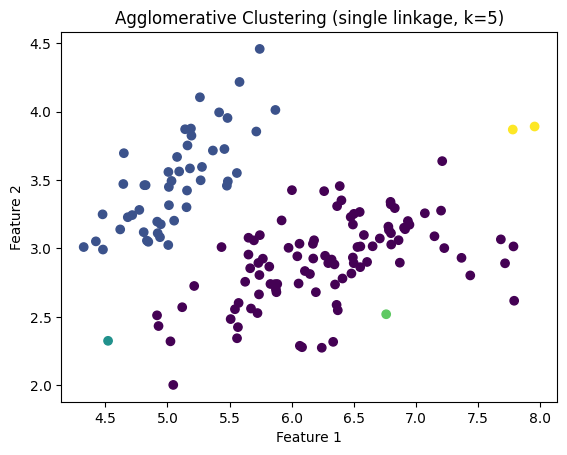

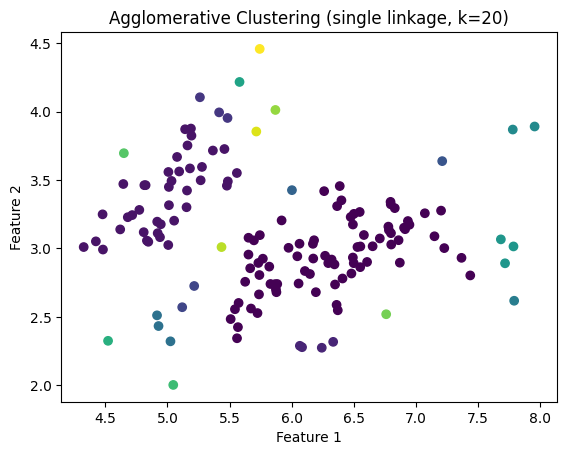

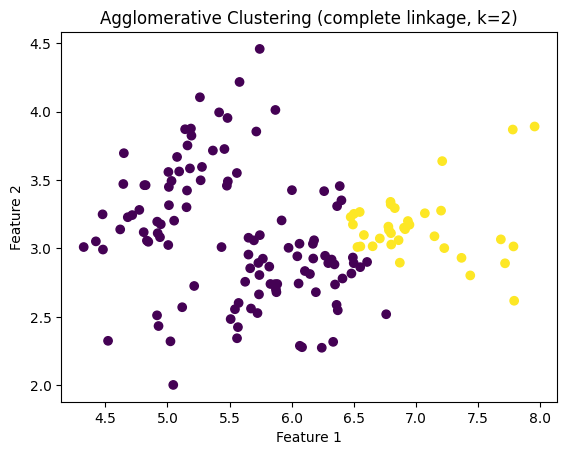

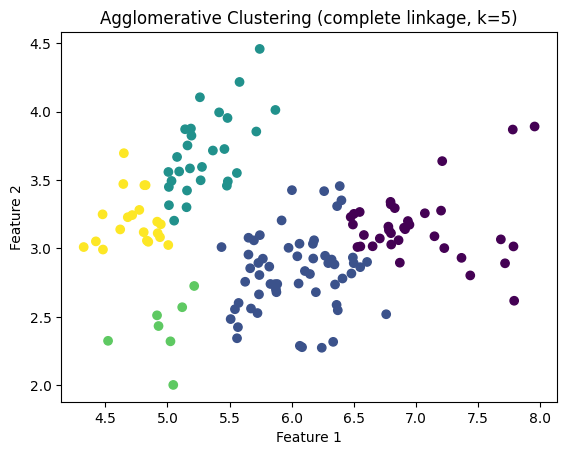

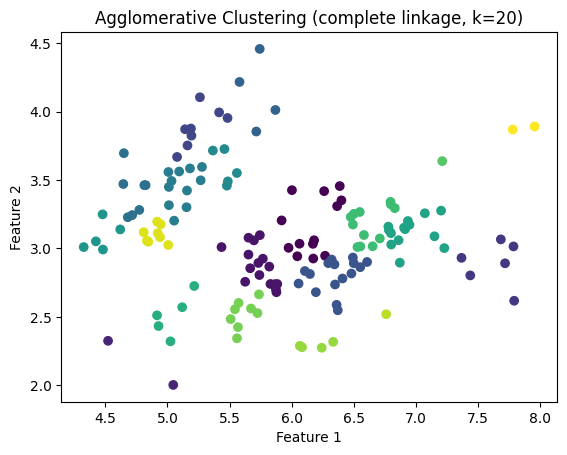

In [7]:
from sklearn.cluster import AgglomerativeClustering

def plot_agglomerative(X, k, linkage_type):
    model = AgglomerativeClustering(n_clusters=k, linkage=linkage_type)
    clust = model.fit_predict(X)  # Cluster assignments

    # Plot results
    plt.scatter(X[:, 0], X[:, 1], c=clust)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"Agglomerative Clustering ({linkage_type} linkage, k={k})")
    plt.show()

# run Agglomerative Clustering with both single and complete linkage
for linkage in ["single", "complete"]:
    for k in [2, 5, 20]:
        plot_agglomerative(X, k, linkage)

#1.4

## Similarities:
Both methods identify similar overall structures when k=2, especially with complete linkage agglomerative clustering.
As k increases, both methods create more granular clusters.
Both methods show some instability with very high k values (k=20).

## Differences:
Single linkage agglomerative clustering performs poorly, creating imbalanced clusters.
Complete linkage agglomerative clustering produces more balanced clusters similar to K-means. K-means clustering clearly shows more compact clustering and is easier to make conclusions about.
K-means clearly marks cluster centers with centroids (red X's), while agglomerative doesn't show centers.

#Problem 2

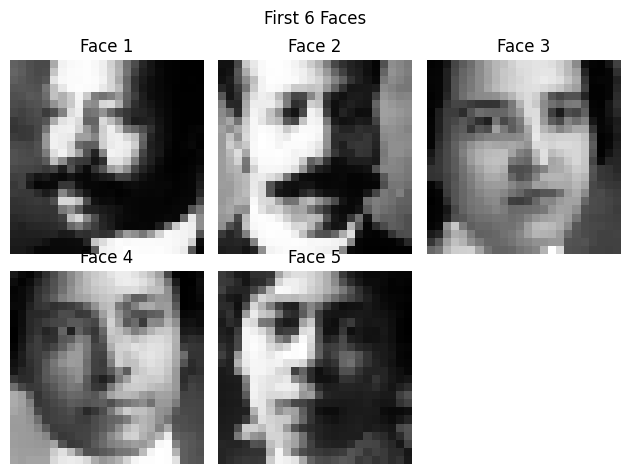

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.genfromtxt("faces.txt", delimiter=None) # load face dataset
plt.figure()
# pick a data point i for display
for i in range(6):
    plt.subplot(2, 3, i + 1)  # create 2-row 3-column grid
    img = np.reshape(X[i, :], (24, 24))  # convert vectorized data to 24x24 image patches
    plt.imshow(img.T, cmap="gray")  # display image patch; you may have to squint
    plt.axis("off")
    plt.title(f"Face {i+1}")

plt.suptitle("First 6 Faces")  # overall title
plt.tight_layout()
plt.show()

#2.1

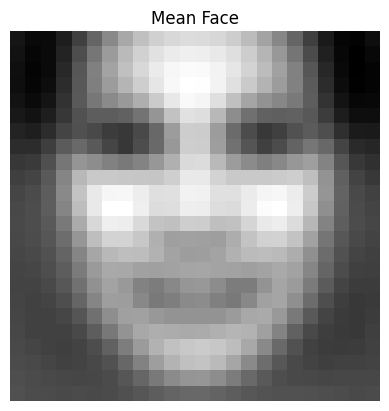

In [ ]:
# 1. Subtract the mean of the face images to make data zero-mean

mu = np.mean(X, axis=0)  # Mean face vector
X0 = X - mu              # Zero-mean data

# Display the mean face
plt.figure()
plt.imshow(np.reshape(mu, (24, 24)).T, cmap="gray")
plt.title("Mean Face")
plt.axis("off")
plt.show()

#2.2

In [ ]:
# 2. Use SVD to decompose the data

from scipy.linalg import svd

U, S, Vh = svd(X0, full_matrices=False)
W = U.dot(np.diag(S))  # So that X0 ≈ W·Vh

print(f"Shape of W: {W.shape}")
print(f"Shape of V transpose: {Vh.shape}")

Shape of W: (4916, 576)
Shape of V transpose: (576, 576)


#2.3

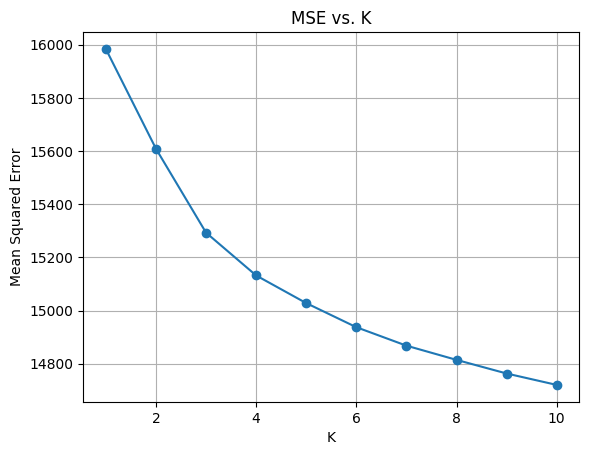

In [ ]:
# 3. Compute MSE for different K values

K_values = range(1, 11)
mse_values = []

for i, K in enumerate(K_values):
    # Approximate X using first K components
    X_approx = (W[:, :K] @ Vh[:K, :]) + mu

    # Compute Mean Squared Error (MSE)
    mse = np.mean((X0 - X_approx)**2)
    mse_values.append(mse)

# Plot MSE values
plt.figure()
plt.plot(K_values, mse_values, marker="o", linestyle="-")
plt.xlabel("K")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs. K")
plt.grid(True)
plt.show()

#2.4

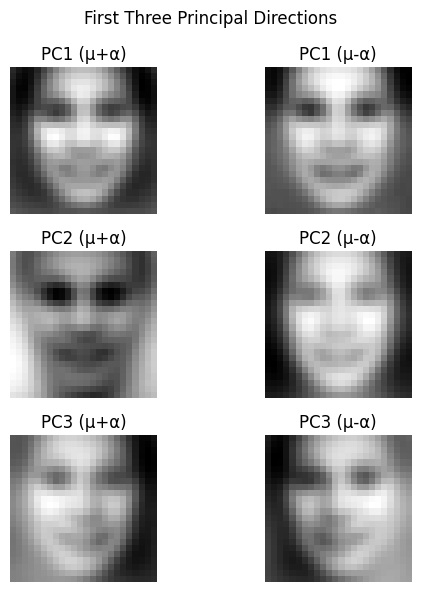

In [ ]:
# 4. Display the first three principal directions

# Assuming Vh contains principal components and mu is the mean face
alpha_values = [2 * np.median(np.abs(W[:, j])) for j in range(3)]  # Compute α for first 3 components

plt.figure(figsize=(6, 6))

for j in range(3):  # Loop over first 3 principal components
    alpha = alpha_values[j]

    # Compute positive and negative variations
    img_pos = np.reshape(mu + alpha * Vh[j, :], (24, 24))
    img_neg = np.reshape(mu - alpha * Vh[j, :], (24, 24))

    # Plot both images
    plt.subplot(3, 2, 2*j + 1)
    plt.imshow(img_pos.T, cmap="gray")
    plt.axis("off")
    plt.title(f"PC{j+1} (μ+α)")

    plt.subplot(3, 2, 2*j + 2)
    plt.imshow(img_neg.T, cmap="gray")
    plt.axis("off")
    plt.title(f"PC{j+1} (μ-α)")

plt.suptitle("First Three Principal Directions")
plt.tight_layout()
plt.show()

#2.5

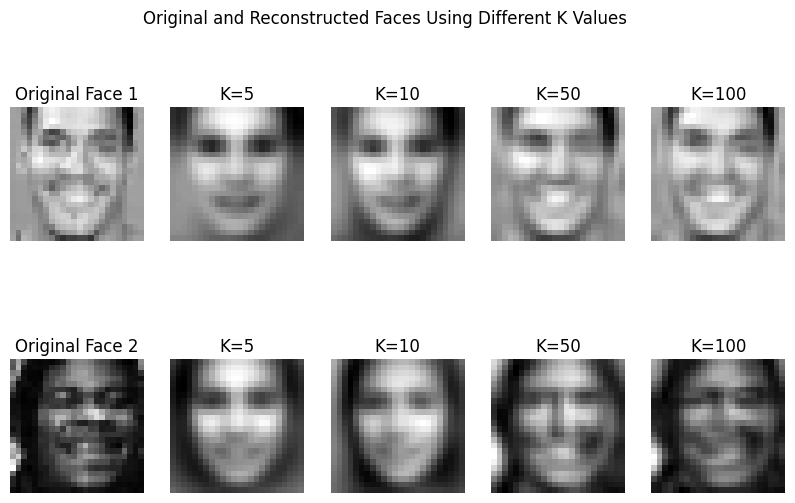

In [ ]:
# 5. Reconstruct two faces using different K values

# Select two random faces for reconstruction
face_indices = [10, 50]  # Indices of two faces

K_values = [5, 10, 50, 100]  # Different principal component counts

plt.figure(figsize=(10, 6))

for f_idx, face_id in enumerate(face_indices):
    original_face = np.reshape(X[face_id, :], (24, 24))  # Original face

    # Plot original face in first column
    plt.subplot(2, len(K_values) + 1, f_idx * (len(K_values) + 1) + 1)
    plt.imshow(original_face.T, cmap="gray")
    plt.axis("off")
    plt.title(f"Original Face {f_idx+1}")

    for i, K in enumerate(K_values):
        # Reconstruct the face using first K principal components
        X_reconstructed = (W[face_id, :K].dot(Vh[:K, :])) + mu
        reconstructed_face = np.reshape(X_reconstructed, (24, 24))

        # Plot the reconstructed face
        plt.subplot(2, len(K_values) + 1, f_idx * (len(K_values) + 1) + i + 2)
        plt.imshow(reconstructed_face.T, cmap="gray")
        plt.axis("off")
        plt.title(f"K={K}")

# Display the plots
plt.suptitle("Original and Reconstructed Faces Using Different K Values")
plt.show()

#2.6

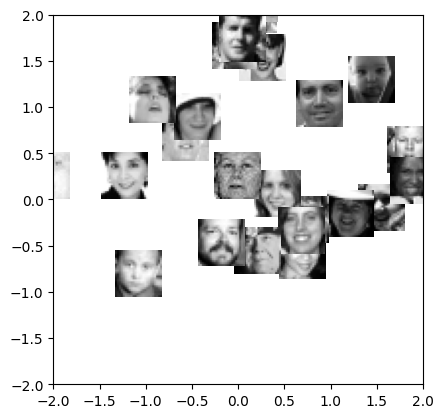

In [ ]:
# 6. Visualize latent space representation

np.random.seed(0)
idx = np.random.choice(X.shape[0], 25, replace=False) # pick some data (randomly or otherwise); an array of integer indices
import transforms
coord,params = transforms.rescale( W[:,0:2] ) # normalize scale of "W" locations plt.figure(); plt.hold(True); # you may need this for pyplot
for i in idx:
  # compute where to place image (scaled W values) & size
  loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
  img = np.reshape( X[i,:], (24,24) ) # reshape to square
  plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
  plt.axis( (-2,2,-2,2) ) # set axis to a reasonable scale

#Statement of Collaboration

I worked on this assignment alone and used all resources available from Canvas to complete this assignment.